In [1]:
# Игнорирем предупреждения
import warnings
warnings.filterwarnings('ignore')

#### Импортируем библиотеки необходимые для работы

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#### Загрузка данных 

In [3]:
df = pd.read_csv('6 class csv.csv')

In [4]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


#### Описание набора данных

##### Признаки:

Temperature (K) - Абсолютная температура (в К)

Luminosity(L/Lo) - Относительная светимость (L/Lo)

Radius(R/Ro) - Относительный радиус (R/Ro)

Absolute magnitude(Mv) - Абсолютная магнитуда (Мв)

Star type - Спектральный класс (0, B, A, F, G, K,, M)

Star color - Цвет звезды (белый, красный, синий, желтый, желто-оранжевый и т.д.)

##### Целевая переменная: 

Spectral Class - Тип звезды (Красный Карлик, Коричневый Карлик, Белый Карлик, Главная последовательность,
Сверхгиганты, гипергиганты)


#### Так как целевая переменная является категориальной, работа представляет из себя задачу мультиклассовой классификации

#### Смотрим набор данных 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


#### В данных нет пустых значений

In [6]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


#### Как видим, у нас имеется 4 числовых фичи (Star type является категориальным закодированным в числа признаком). 
Кроме того, во всех 4 признаках среднее сильно отличается от медианы, что говорит о том, что их распределения не нормальны 

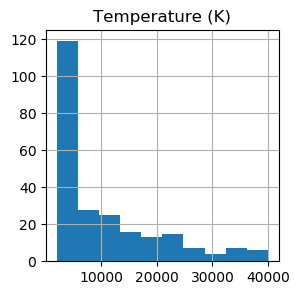

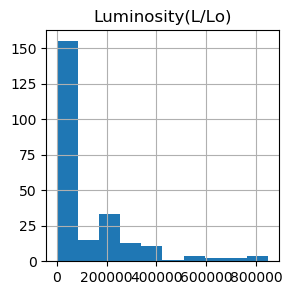

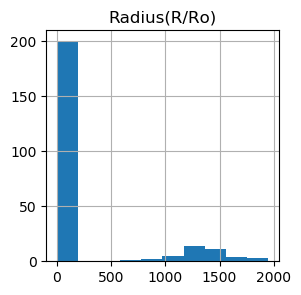

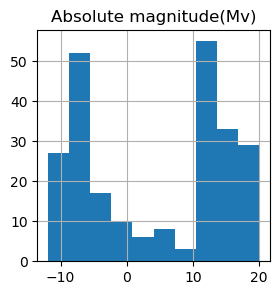

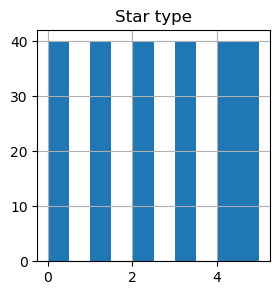

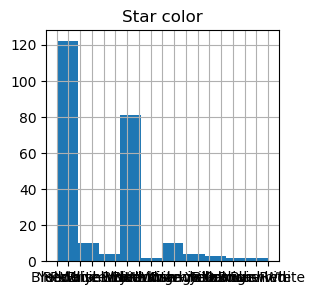

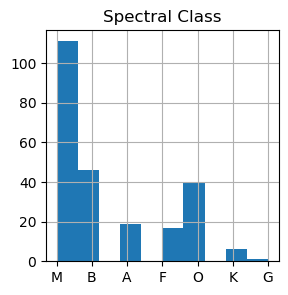

In [7]:
# Построим распределения этих признаков
for col in df.columns:
    df[col].hist(figsize=(3, 3))
    plt.title(col)
    plt.show()

#### Как видим из графиков выше, распределение этих четырех классов действительно далеко от нормального. Температура, Светимость и радиус имеют огромный левый хвост, а магнетизм представляет из себя бимодальное распределение.

#### Строим корреляционную матрицу для числовых признаков

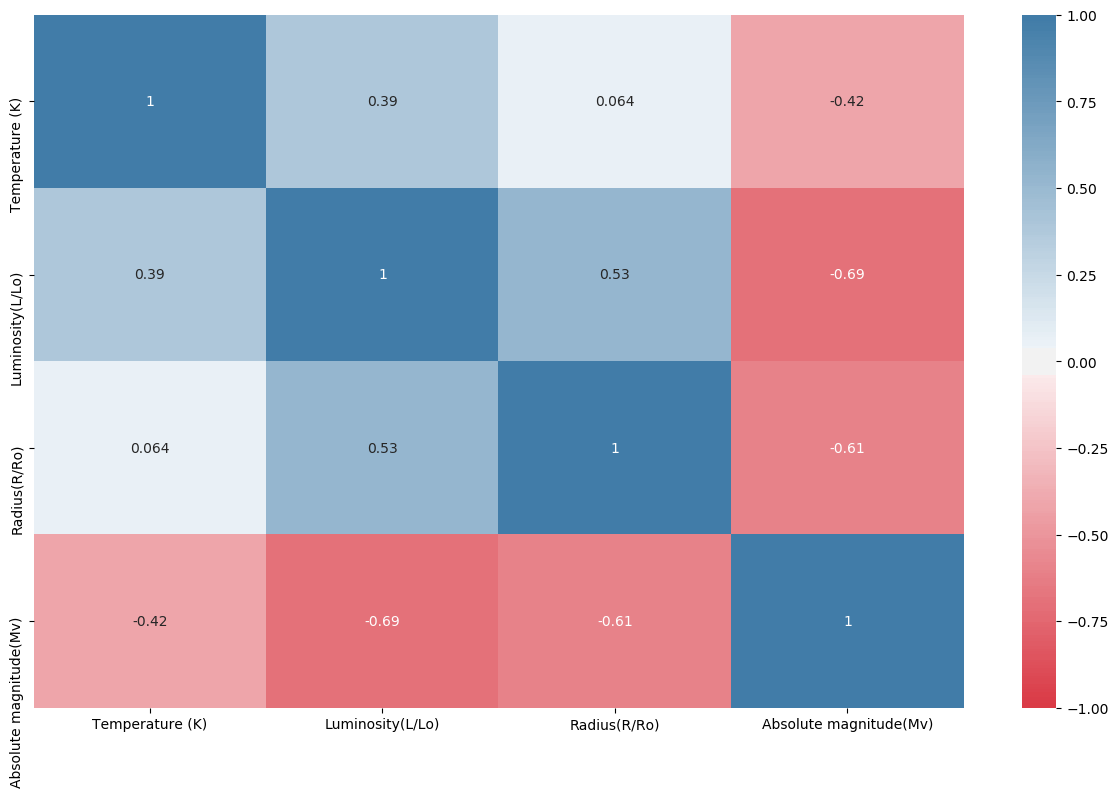

In [8]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(
df.drop('Star type', axis = 1).corr().round(5),
annot=True,
annot_kws={'size': 10},
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 240, n=200))
plt.show()

#### У признака Absolute magnitude(Mv)	имеется значительная отрицательная корреляция с остальными признаками. Возможно, стоит попробовать построить модель без него.

### Переводим значения в числовую шкалу

In [9]:
cols = ['Star color', 'Spectral Class']

le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [10]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


#### Разделяем выборку на бучающую и тестовую

In [11]:
X = df.drop(['Spectral Class'], axis=1)
Y = df['Spectral Class']

In [12]:
# Для теста возьмем 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

#### Построение моделей

In [13]:
# Вообще, с задачей бы на отлично справился какой-нибудь XGboost, 
# но он слишком хорошо работает In Box, поэтому давайте возьмем алгоритмы, более чувствительные к гиперпараметрам

#### Метод K - ближайших

In [14]:
%%time
# Инициализируем с дефолтными гиперпараметрами
model_knn = KNeighborsClassifier()
# Учим
model_knn.fit(X_train, Y_train)

Wall time: 1.91 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.64      0.75      0.69        12
           2       0.75      0.75      0.75         8
           3       0.00      0.00      0.00         1
           4       1.00      0.67      0.80         3
           5       0.88      0.94      0.91        32
           6       0.40      0.57      0.47         7

    accuracy                           0.75        72
   macro avg       0.63      0.57      0.58        72
weighted avg       0.76      0.75      0.74        72



#### Так как задача мультиклассововой регрессии, будем ориентироваться на точность. Если посмотреть f меру для каждого класса, то можно увидеть, что хуже всего определяется 3й, 1й и 6й классы, а лучше всего - 5й

#### Более подробные результаты:

Text(0.5, 15.0, 'Предсказанные значения')

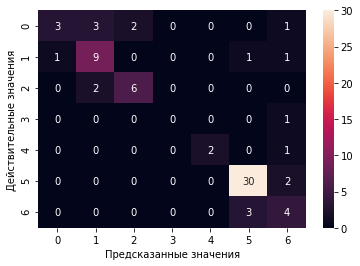

In [16]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### Отметим дисбаланс классов. 3 и 4 класса представленны крайне мало

### Метод логистической регрессии

In [17]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
Y_pred = model_lr.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.22      1.00      0.36        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.80      0.25      0.38        32
           6       0.50      0.57      0.53         7

    accuracy                           0.33        72
   macro avg       0.22      0.26      0.18        72
weighted avg       0.44      0.33      0.28        72



Text(0.5, 15.0, 'Предсказанные значения')

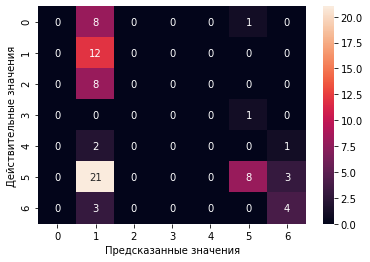

In [19]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### Видно, что логистическая регрессия справилась с задачей заметно хуже, чем knn. Возьмем лучшую модель и попробуем оптимизировать её гиперпараметры

#### Оптимизация гиперпараметров

In [20]:
# Самый чувствительный параметр - это число k. Поэтому основной "упор" будем делать именно на него
# Кроме того, проверим алгоритм с весами, зависящими от расстояния и без этих весов (Неважно как делеки точки)
# И метрику расстояния (манхеттонскую и эквклидову)
param_grid = {"n_neighbors": range(1, 50, 1), 
              "weights": ['uniform', 'distance'], 
              "p": [1, 2]}

In [21]:
%%time

# Грид сечем бегаем по 4 фолдам
model_knn = KNeighborsClassifier()
model_knn_opt = GridSearchCV(estimator = model_knn, param_grid = param_grid, cv = 4, verbose= 1, n_jobs = -1)

model_knn_opt.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 196 candidates, totalling 784 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


Wall time: 3.21 s


[Parallel(n_jobs=-1)]: Done 784 out of 784 | elapsed:    3.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

#### Лучшие параметры:

In [22]:
model_knn_opt.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

#### Смотрим, как сильно улучшились результаты

In [23]:
Y_pred = model_knn_opt.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.60      0.75      0.67        12
           2       0.67      0.50      0.57         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.84      0.97      0.90        32
           6       0.50      0.71      0.59         7

    accuracy                           0.72        72
   macro avg       0.48      0.47      0.46        72
weighted avg       0.69      0.72      0.69        72



Text(0.5, 15.0, 'Предсказанные значения')

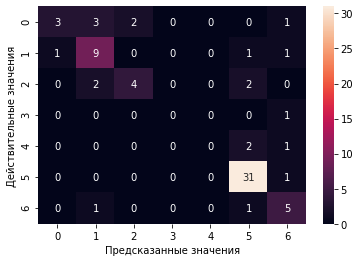

In [24]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### Наблюдаем заметное улучшение итоговой точности.